In [2]:
# Import library
import pandas as pd
import networkx as nx

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(0, 1), (0, 2), (0, 4), (0, 5), (0, 6), (0, 7), (0, 9), (1, 0), (1, 4), (1, 5), (1, 6), (1, 7), (1, 9), (2, 0), (2, 4), (2, 5), (2, 6), (2, 7), (2, 9), (3, 4), (3, 6), (3, 7), (3, 9), (4, 0), (4, 4), (4, 5), (4, 6), (4, 7), (4, 9), (5, 2), (5, 4), (5, 9), (6, 0), (6, 7), (7, 0), (7, 4), (7, 5), (7, 6), (7, 9), (8, 3), (9, 0), (9, 4), (9, 5), (9, 6), (9, 7), (9, 9), (10, 0), (10, 4), (10, 6), (10, 9)]


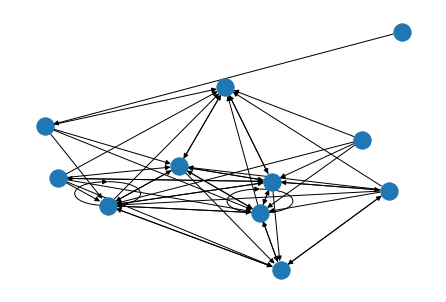

In [4]:
# Load dataset
input_data = pd.read_csv('mygraph.csv', index_col=0)
G = nx.DiGraph(input_data.values)

nx.draw(G)
print(G.nodes())
print(G.edges())

In [5]:
import collections

# BFS algorithm
def bfs(graph, root):

    visited, queue = set(), collections.deque([root])
    visited.add(root)

    while queue:

        # Dequeue a vertex from queue
        vertex = queue.popleft()
        print(str(vertex) + " ", end="")

        # If not visited, mark it as visited, and
        # enqueue it
        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)
bfs(G, 0)

0 1 2 4 5 6 7 9 

In [6]:
comp = nx.strongly_connected_components(G)
sccs = list(nx.strongly_connected_components(G))
sccs.reverse()
print(sccs)

[{10}, {8}, {3}, {0, 1, 2, 4, 5, 6, 7, 9}]


In [7]:
p1 = nx.shortest_path(G, source=1, weight='weight')
print(p1)

{1: [1], 0: [1, 0], 4: [1, 4], 5: [1, 5], 6: [1, 6], 7: [1, 7], 9: [1, 9], 2: [1, 0, 2]}


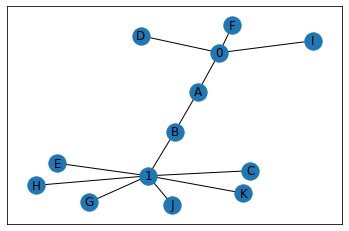

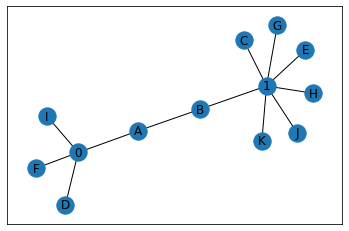

[('0', 'D', {'d': '0'}), ('0', 'F', {'d': '0'}), ('0', 'I', {'d': '0'}), ('1', 'C', {'d': '0'}), ('1', 'E', {'d': '0'}), ('1', 'G', {'d': '0'}), ('1', 'H', {'d': '0'}), ('1', 'J', {'d': '0'}), ('1', 'K', {'d': '0'}), ('A', '0', {'d': '1'}), ('A', 'B', {'d': 'C'}), ('B', '1', {'d': '0'})]


In [9]:
import csv
M = nx.Graph()
with open('mygraph.csv', newline='') as csvfile:
    datareader = csv.reader(csvfile, delimiter=',')
    for row in datareader:
      M.add_edge(row[0],row[1],d=str(row[2]))

import matplotlib.pyplot as plt

nx.draw_networkx(M,with_labels=True)
plt.show()
T = nx.minimum_spanning_tree(M)
nx.draw_networkx(T,with_labels=True)
plt.show()
print(sorted(T.edges(data=True)))